In [ ]:
As usual...

In [1]:
from py5canvas import *

__Note__. The videos below show slightly different graphics from the output of the program as presented here, due to modifications made with the AxiDraw in mind.

In order to solve this exercise you'll need to manipulate a set of points that make up the letters. 
This uses the size of the text in the given font, to shift the origin of the coordinate system so that the text is centered in the window.

Now, your turn!

#### Step-by-step

1. Load a font and visualize a text with it. Experiment with the different settings (alignment, font etc)

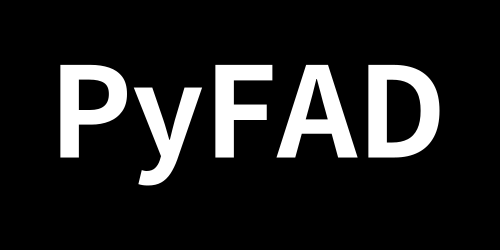

In [6]:
create_canvas(500, 250)
background(0)
translate(center)
text_font('NotoSansSC-Bold.ttf')
text_size(height/2)
text_align('center', 'center')
no_stroke()
fill(255)
text("PyFAD", 0, 0)
show()

2. Get all the points that make up the font. We can use the `text_points` function for this task. It gives a 2d numpy array with a point for each row. Think of it as a list of 2d vectors. We can iterate over the points with a for loop and draw each point. 


In [12]:
from importlib import reload
from py5canvas import canvas
reload(canvas)
from py5canvas import *

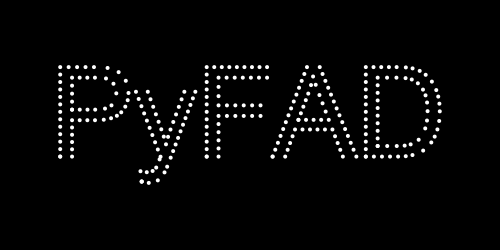

In [21]:
create_canvas(500, 250)
background(0)
translate(center)
text_font('Arial')
text_size(height/2)
text_align('center', 'center')
no_stroke()
fill(255)
text_align('center', 'center')
points = text_points("PyFAD", [0, 0], 7)
for p in points:
    circle(p, 2)
show()

In the code above, try to offset te points with randomness. Recall that we can generate a 2d array of random numbers by using the named `size` parameter. So one way to offset the points is to add 
`random_uniform(-5, 5, size=points.shape)` to the `points` variable.

Now let's generate more structured randomness using noise. The current implementation of noise in Py5Canvas does not support NumPy arrays, so we need to rely on a loop to offset the points. We want the offset to be positive and negative, so we first create a function that transforms the 0 to 1 value of noise into -1 to 1 (you could also use `remap`):

In [16]:
def signed_noise(x, y=0.0):
    return noise(x, y)*2 - 1

Here we introduce a new syntax, a default second argument that is equal to `0.0`. If we omit the argument the value will be the one set in the argument list.

Now here is some code setup with a loop, that also indexes the points with a variable `i`, given by wrapping the points in `enumerate`:

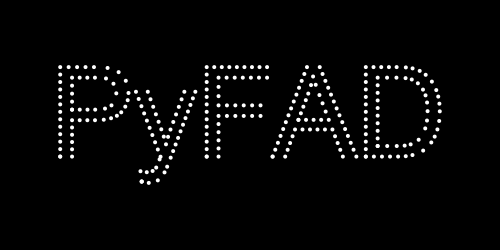

In [48]:
create_canvas(500, 250)
background(0)
translate(center)
text_font('Arial')
text_size(height/2)
text_align('center', 'center')
no_stroke()
fill(255)
text_align('center', 'center')
points = text_points("PyFAD", [0, 0], 7)
for i, p in enumerate(points):
    offset = np.array([0.0, 0.0])*70
    circle(p + offset, 2)
show()

The code contains a zero offset, where we create a vector with the NumPy syntax `np.array([x, y])`. This is **identical** to using the py5canvas `Vector(x, y)` construct. We multiply the value by 70 to scale the offset by a visible amount (from between -1 and 1). To make this work replace the x and y coordinates inside the array with two calls to the `signed_noise` function we defined earlier. One coordinate could be `signed_noise(i*0.01 + 0.4)` for example, and a the second could be something similar with a different phase from `0.4`. 

You should see something like this:

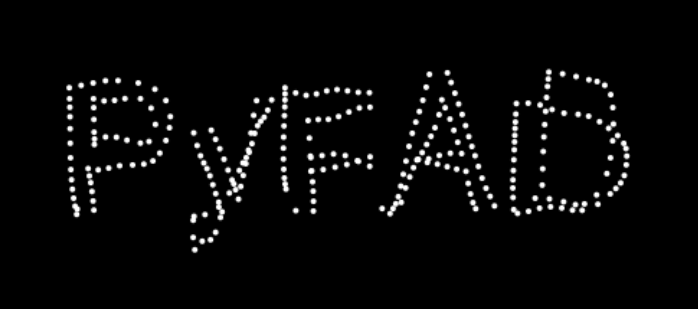

Now in the code cell below, copy the code above and try using the coordinates of a point `p` to influence 2d noise. E.g. one coordinate of the offset could be `signed_noise(p[0]*0.01 + 0.5, p[1]*0.01)`. Note that this still gives us **one** value, while we use a 2d input. Imagine it like asking for the height at a given position of the map of some mountains.




3. Extend this example. 

- Why not do something with the color? Use the [lerp] function to linearly interpolate between two colors. You can use `noise()`, only this time you will use the Py5canvas to get values between 0 and 1 for each channel, and multply the values by 255. Alternatively you can change the color mode to have a range between 0 and 1 for example using
```python
color_mode('rgb', 1.0)
```
But you will have to change any other color parameter to that range. You can also try `hsv` color mode (Hue saturation value). 

- Try to make this into an interactive sketch. Remember that the current version of `noise` is very slow in py5canvas. Work in progress to get a faster vectorized version using this library: https://github.com/pvigier/perlin-numpy. You can install it and try it out with `pip install perlin-numpy` (it is safe, after activating the environment) but it is quite low level and limited to certain resolutions.
